# Year by year comparison

(2016 vs 2017 vs 2018 vs 2019 vs 2020 vs 2021)

Is there consistency? e.g. thrombolysis, arrival to scan, ambulance times. Note: we don't know if they had COVID.

Existing research includes:
* https://www.strokeaudit.org/SupportFiles/Documents/Webinars/Webinar-slides.aspx
* https://www.strokeaudit.org/SupportFiles/Documents/Research/Impact-of-Covid-on-SU-access-Poster-Number-098.aspx
* https://www.ahajournals.org/doi/pdf/10.1161/STROKEAHA.120.032253 (and they have COVID-19 status for 23%)

Aim is to understand whether it would be appropriate to include 2016 or 2020 or 2021 in analysis.

## Set up

In [1]:
# Import packages and functions
from dataclasses import dataclass
import matplotlib.pyplot as plt
import os
import pandas as pd

# Linting
%load_ext pycodestyle_magic
%pycodestyle_on

In [2]:
# Set paths and filenames
@dataclass(frozen=True)
class Paths:
    '''Singleton object for storing paths to data and files.'''

    data_path = './../output/'
    data_filename = 'reformatted_data.csv'
    admission_only_filename = 'reformatted_data_admissions_only.csv'
    hospitals_filename = 'clean_stroke_hospitals_2022.csv'

    notebook = '01'


paths = Paths()

In [3]:
# Load data
data = pd.read_csv(os.path.join(paths.data_path, paths.data_filename))
data_full = pd.read_csv(os.path.join(
    paths.data_path, paths.admission_only_filename))

## Admissions

Using restricted dataset.

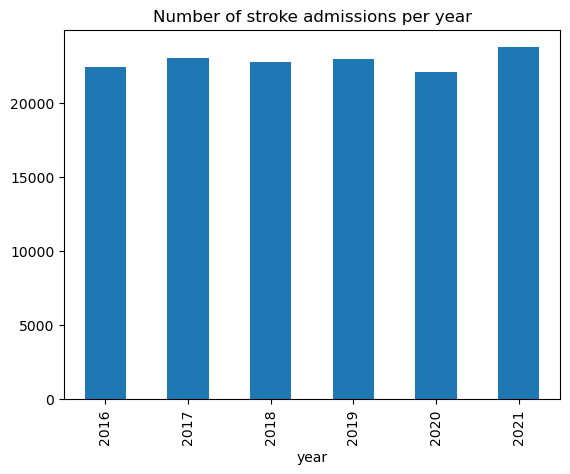

In [4]:
# Admissions per year
yearly_admissions = data.groupby('year').size().reset_index(name='admissions')
yearly_admissions.plot.bar(x='year', y='admissions',
                           title='Number of stroke admissions per year',
                           legend=None)
plt.show()

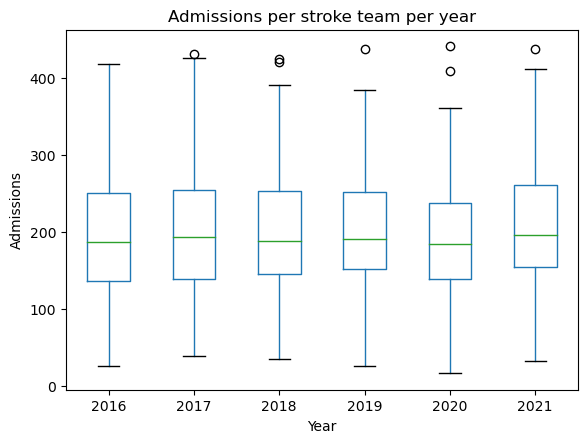

In [5]:
# Find number of admissions per stroke team per year
team_admissions_yearly = (data
                          .groupby(['stroke_team', 'year'])
                          .size()
                          .reset_index(name='admissions'))

# Plot per year
team_admissions_yearly.boxplot('admissions', by='year')
plt.xlabel('Year')
plt.ylabel('Admissions')
plt.title('Admissions per stroke team per year')
plt.suptitle('')
plt.grid(None)
plt.show()